<a href="https://colab.research.google.com/github/GabrielaRomoM/SIGNALS-THEORY_2024-1/blob/main/NNParametros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from scipy.signal import spectrogram
from scipy.signal import welch
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from scipy.signal import get_window
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense
import seaborn as sns

In [ ]:
N = 1000 # Numero de señales
M = 1024 # puntos de cada señal

fs = 1024 #Frecuencia de muestreo

t = np.linspace(0, 1, M) #Vector tiempo para todas las señales

#Función que genera la señal periódica x(t)=cos(wot)-1/3sen(3wot)+1/5cos(5wot)
def senal(frecuencia1):
  #Frecuencias
  frecuencia2 = 2*frecuencia1
  frecuencia3 = 3*frecuencia1

  #Amplitudes
  Amplitud1 = 1
  Amplitud2 = 1/3
  Amplitud3 = 1/5

  senal = (Amplitud1*np.cos(2*np.pi*frecuencia1*t)- Amplitud2*np.sin(2*np.pi*frecuencia2*t)+Amplitud3*np.cos(2*np.pi*frecuencia3*t))

  return senal

#Función que genera ruido blanco gaussiano
def noise(media, tamaño, std): #std=0.1,0.3,1,3,10,30
    ruido = np.random.normal(media, std, size = tamaño)
    return ruido

#Función que calcula el PSD usando el metodo de Welch
def PSD(x, fs, M):
    freqs, Pxx = welch(x, fs, nperseg=M, return_onesided=True, scaling='density', axis=0)
    #nperseg=M use the total lenght of the signal for the calculation
    # return_onesided = True returns the half because of simetry
    #scaling = 'density' better when wanting to know how the PSD distributes across the frecuency spectrum.
    #It focus better on the PSD than the spectral magnitude
    return freqs, Pxx

matriz_X1 = np.zeros((N, M ))  # va a almacenar N señales
matriz_PSD1 = np.zeros((N, M//2 +1)) # va a almacenar N PSD's de M/2+1 puntos porque son las frecuencias positivas +1 por la simetria

matriz_X2 = np.zeros((N, M ))
matriz_PSD2 = np.zeros((N, M//2 +1))

matriz_X3 = np.zeros((N, M ))
matriz_PSD3 = np.zeros((N, M//2 +1))

matriz_X4 = np.zeros((N, M ))
matriz_PSD4 = np.zeros((N, M//2 +1))

matriz_X5 = np.zeros((N, M ))
matriz_PSD5 = np.zeros((N, M//2 +1))

matriz_X6 = np.zeros((N, M ))
matriz_PSD6 = np.zeros((N, M//2 +1))

#Para std=0.1
for i in range(N):

    x1 = senal(50) + noise(0, M, 0.1)  # Generar señal con ruido
    matriz_X1[i] = x1

    freqs, psd = PSD(x1, fs, M)  # Calcular PSD
    matriz_PSD1[i] = psd

#Para std=0.3
for i in range(N):

    x2 = senal(50) + noise(0, M, 0.3)
    matriz_X2[i] = x2

    freqs2, psd2 = PSD(x2, fs, M)
    matriz_PSD2[i] = psd2

#Para std=1
for i in range(N):

    x3 = senal(50) + noise(0, M, 1)
    matriz_X3[i] = x3

    freqs3, psd3 = PSD(x3, fs, M)
    matriz_PSD3[i] = psd3

#Para std=3
for i in range(N):

    x4 = senal(50) + noise(0, M, 3)
    matriz_X4[i] = x4

    freqs4, psd4 = PSD(x4, fs, M)
    matriz_PSD4[i] = psd4

#Para std=10
for i in range(N):

    x5 = senal(50) + noise(0, M, 10)
    matriz_X5[i] = x5

    freqs5, psd5 = PSD(x5, fs, M)
    matriz_PSD5[i] = psd5

#Para std=30
for i in range(N):

    x6 = senal(50) + noise(0, M, 30)
    matriz_X6[i] = x6

    freqs6, psd6 = PSD(x6, fs, M)
    matriz_PSD6[i] = psd6

matriz_X = np.concatenate((matriz_X1, matriz_X2, matriz_X3, matriz_X4, matriz_X5, matriz_X6), axis=0)
matriz_PSD = np.concatenate((matriz_PSD1, matriz_PSD2, matriz_PSD3, matriz_PSD4, matriz_PSD5, matriz_PSD6), axis=0)

In [ ]:
#MLP primera estrategia
X_train, X_test, Y_train, Y_test = train_test_split(matriz_X, matriz_PSD, test_size=0.3, random_state=42)
#30% of the data is for X_test and Y_test and 70% is for X_train and Y_train
#random_state randomness in the data split everytime it runs
model = Sequential([ #one layer before the other
    tf.keras.Input(shape=(M,)), #defines the input, lengt M
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(M//2 + 1) #el numero de neuronas corresponde a la longitud del PSD objetivo
])
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['accuracy'])
# Entrenamiento
start_time = time.time()
history = model.fit(X_train, Y_train, epochs=100, validation_split=0.2)
end_time = time.time()

model.summary()

training_time = end_time - start_time
print("Tiempo de entrenamiento: {:.2f} segundos".format(training_time))

history_dict = history.history #diccionario que contiene los valores de las métricas y la pérdida durante el entrenamiento
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

Epoch 1/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.0000e+00 - loss: 11.8912 - val_accuracy: 0.0000e+00 - val_loss: 2.2906
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 4.8439e-04 - loss: 1.5520 - val_accuracy: 0.0012 - val_loss: 1.4896
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 5.1296e-05 - loss: 1.1575 - val_accuracy: 0.0012 - val_loss: 1.3243
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0017 - loss: 1.0613 - val_accuracy: 0.0000e+00 - val_loss: 1.2709
Epoch 5/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 3.7137e-04 - loss: 1.0499 - val_accuracy: 0.0000e+00 - val_loss: 1.2467
Epoch 6/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 6.7631e-04 - loss: 0.9815 - val_accuracy: 0.0000e+00 - val_loss: 1.2295
Epoch 7/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0015 - loss: 1.0596 - val_accuracy: 0.0000e+00 - val_loss: 1.2145
Epoch 8/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 513)                 │          66,177 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,265,605 (8.64 MB)

 Trainable params: 755,201 (2.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,510,404 (5.76 MB)

Tiempo de entrenamiento: 213.82 segundos


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tabla de Métricas L2:
   Varianza del Ruido       MSE      RMSE
0                 0.1  0.000010  0.003101
1                 0.3  0.000010  0.003086
2                 1.0  0.000018  0.004224
3                 3.0  0.000684  0.026159
4                10.0  0.050564  0.224865
5                30.0  3.240266  1.800074

Tabla de Métricas L1:
   Varianza del Ruido       MAE
0                 0.1  0.002494
1                 0.3  0.002448
2                 1.0  0.002841
3                 3.0  0.019059
4                10.0  0.175855
5                30.0  1.262072


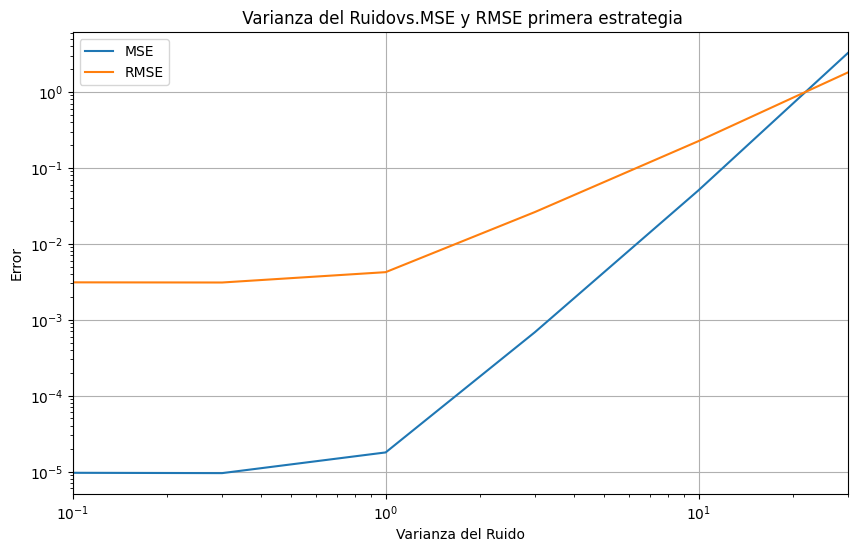

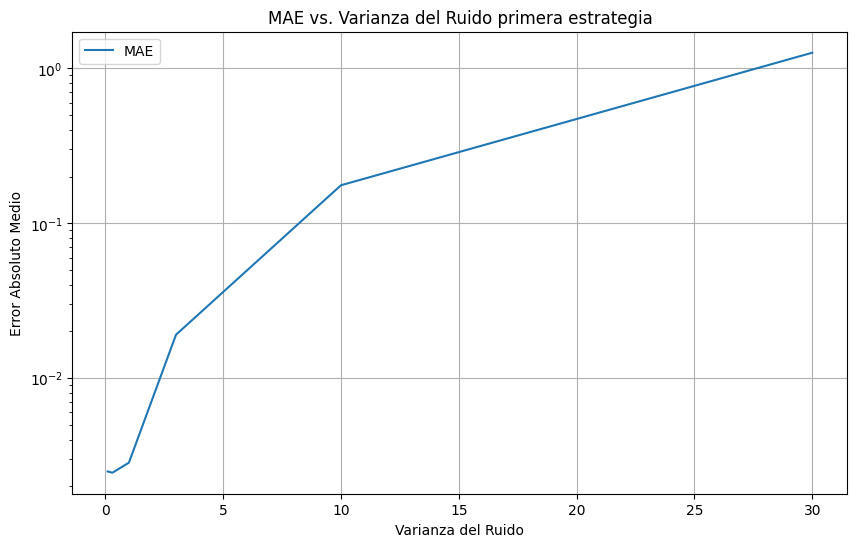

In [ ]:
Y_pred = model.predict(X_test)
# Predicciones para cada matriz con ruido diferente
Y_pred1 = model.predict(matriz_X1)
Y_pred2 = model.predict(matriz_X2)
Y_pred3 = model.predict(matriz_X3)
Y_pred4 = model.predict(matriz_X4)
Y_pred5 = model.predict(matriz_X5)
Y_pred6 = model.predict(matriz_X6)

# Calcular MSE, MAE, RMSE para cada conjunto de predicciones
mse1 = mean_squared_error(matriz_PSD1, Y_pred1)
mse2 = mean_squared_error(matriz_PSD2, Y_pred2)
mse3 = mean_squared_error(matriz_PSD3, Y_pred3)
mse4 = mean_squared_error(matriz_PSD4, Y_pred4)
mse5 = mean_squared_error(matriz_PSD5, Y_pred5)
mse6 = mean_squared_error(matriz_PSD6, Y_pred6)
mae1 = mean_absolute_error(matriz_PSD1, Y_pred1)
rmse1 = np.sqrt(mse1)
mae2 = mean_absolute_error(matriz_PSD2, Y_pred2)
rmse2 = np.sqrt(mse2)
mae3 = mean_absolute_error(matriz_PSD3, Y_pred3)
rmse3 = np.sqrt(mse3)
mae4 = mean_absolute_error(matriz_PSD4, Y_pred4)
rmse4 = np.sqrt(mse4)
mae5 = mean_absolute_error(matriz_PSD5, Y_pred5)
rmse5 = np.sqrt(mse5)
mae6 = mean_absolute_error(matriz_PSD6, Y_pred6)
rmse6 = np.sqrt(mse6)

# Crear un DataFrame de Pandas para las métricas L2
df_l2 = pd.DataFrame({
    'Varianza del Ruido': [0.1, 0.3, 1, 3, 10, 30],
    'MSE': [mse1, mse2, mse3, mse4, mse5, mse6],
    'RMSE': [rmse1, rmse2, rmse3, rmse4, rmse5, rmse6]
})

# Crear un DataFrame de Pandas para las métricas L1
df_l1 = pd.DataFrame({
    'Varianza del Ruido': [0.1, 0.3, 1, 3, 10, 30],
    'MAE': [mae1, mae2, mae3, mae4, mae5, mae6]
})

# Imprimir las tablas
print("Tabla de Métricas L2:")
print(df_l2)
print("\nTabla de Métricas L1:")
print(df_l1)

# Gráfica de MSE y RMSE
plt.figure(figsize=(10, 6))
plt.loglog(df_l2['Varianza del Ruido'],df_l2['MSE'] ,label='MSE')
plt.loglog(df_l2['Varianza del Ruido'],df_l2['RMSE'], label='RMSE')
#sns.lineplot(x='Varianza del Ruido', y='MSE', data=df_l2, marker='o', label='MSE')
#sns.lineplot(x='Varianza del Ruido', y='RMSE', data=df_l2, marker='s', label='RMSE')
plt.ylabel('Error')
plt.xlabel('Varianza del Ruido')
plt.title(' Varianza del Ruidovs.MSE y RMSE primera estrategia' )
plt.xlim(min(df_l2['Varianza del Ruido']), max(df_l2['Varianza del Ruido']))
plt.legend()
plt.grid(True)
#plt.show()

# Gráfica de MAE
plt.figure(figsize=(10, 6))
plt.semilogy(df_l1['Varianza del Ruido'], df_l1['MAE'],label='MAE')
#sns.lineplot(x='Varianza del Ruido', y='MAE', data=df_l1, marker='o', label='MAE')
plt.xlabel('Varianza del Ruido')
plt.ylabel('Error Absoluto Medio')
plt.title('MAE vs. Varianza del Ruido primera estrategia')
plt.legend()
plt.grid(True)
#plt.show()

In [ ]:
#MLP segundo metodo de entrenamiento
# Calcula el promedio de matriz_X y matriz_PSD
X_mean = np.mean(matriz_X, axis=0)
PSD_mean = np.mean(matriz_PSD, axis=0)

# Redimensiona X_mean y PSD_mean para que tengan la forma (1, M) y (1, M//2 + 1) respectivamente
X_mean = X_mean.reshape(1, -1)
PSD_mean = PSD_mean.reshape(1, -1)

# Crea un nuevo modelo con la misma arquitectura
new_model = Sequential([
    tf.keras.Input(shape=(M,)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(M//2 + 1)
])

new_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['accuracy'])

# Entrena el nuevo modelo con los promedios
new_history = new_model.fit(X_mean, PSD_mean, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0000e+00 - loss: 0.1579
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.0000e+00 - loss: 0.1366
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.0000e+00 - loss: 0.1223
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.0000e+00 - loss: 0.1135
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.0000e+00 - loss: 0.1084
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.0000e+00 - loss: 0.1049
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.0000e+00 - loss: 0.1026
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.0000e+00 - loss: 0.1008
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.0000e+00 - loss: 0.0995
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.0000e+00 - loss: 0.0985
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.0000e+00 - loss: 0.0975
Epoch 12/100
1/1 ━━━━━━━━

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Tabla de Métricas L2 (Nuevo Modelo):
   Varianza del Ruido        MSE      RMSE
0                 0.1   0.083103  0.288276
1                 0.3   0.084525  0.290732
2                 1.0   0.138754  0.372497
3                 3.0   0.768767  0.876794
4                10.0   8.399071  2.898115
5                30.0  71.953466  8.482539

Tabla de Métricas L1 (Nuevo Modelo):
   Varianza del Ruido       MAE
0                 0.1  0.269027
1                 0.3  0.266711
2                 1.0  0.311546
3                 3.0  0.704177
4                10.0  2.312066
5                30.0  6.756161


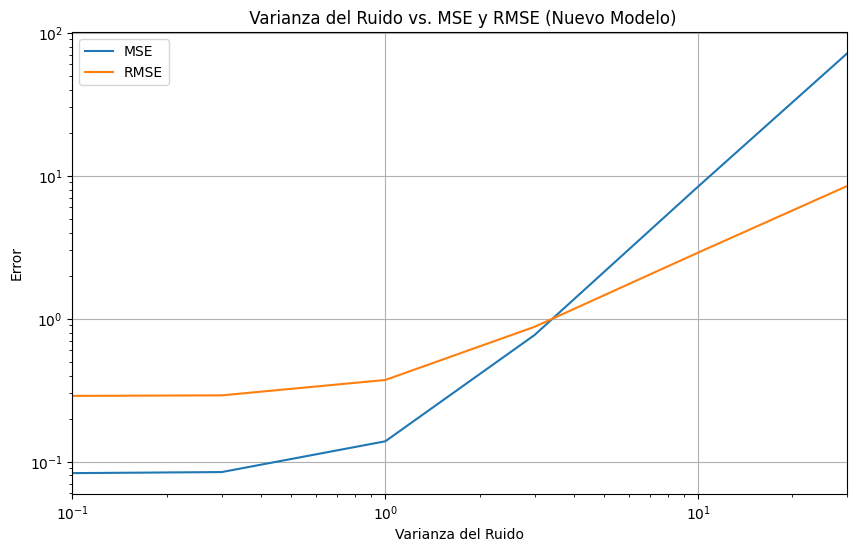

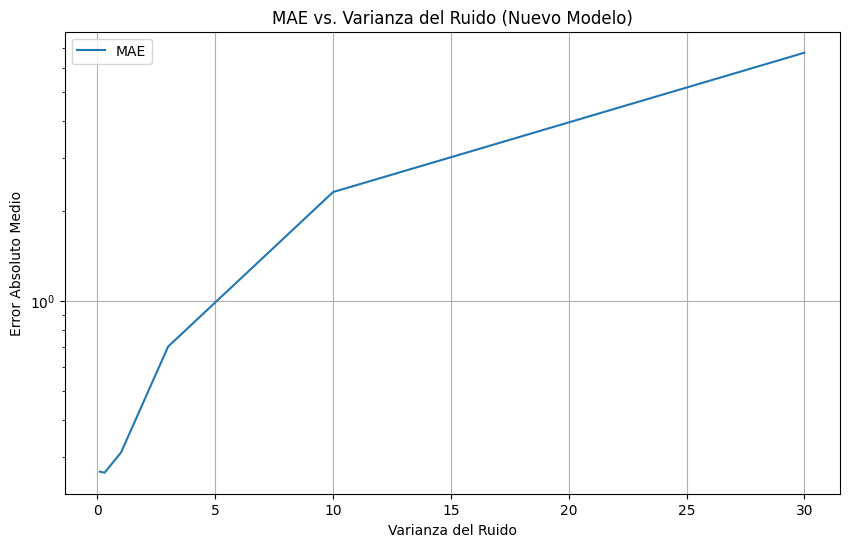

In [ ]:
# Predicciones para cada matriz con ruido diferente
Y_pred1_new = new_model.predict(matriz_X1)
Y_pred2_new = new_model.predict(matriz_X2)
Y_pred3_new = new_model.predict(matriz_X3)
Y_pred4_new = new_model.predict(matriz_X4)
Y_pred5_new = new_model.predict(matriz_X5)
Y_pred6_new = new_model.predict(matriz_X6)

# Calcular MSE, MAE, RMSE para cada conjunto de predicciones
mse1_new = mean_squared_error(matriz_PSD1, Y_pred1_new)
mse2_new = mean_squared_error(matriz_PSD2, Y_pred2_new)
mse3_new = mean_squared_error(matriz_PSD3, Y_pred3_new)
mse4_new = mean_squared_error(matriz_PSD4, Y_pred4_new)
mse5_new = mean_squared_error(matriz_PSD5, Y_pred5_new)
mse6_new = mean_squared_error(matriz_PSD6, Y_pred6_new)
mae1_new = mean_absolute_error(matriz_PSD1, Y_pred1_new)
rmse1_new = np.sqrt(mse1_new)
mae2_new = mean_absolute_error(matriz_PSD2, Y_pred2_new)
rmse2_new = np.sqrt(mse2_new)
mae3_new = mean_absolute_error(matriz_PSD3, Y_pred3_new)
rmse3_new = np.sqrt(mse3_new)
mae4_new = mean_absolute_error(matriz_PSD4, Y_pred4_new)
rmse4_new = np.sqrt(mse4_new)
mae5_new = mean_absolute_error(matriz_PSD5, Y_pred5_new)
rmse5_new = np.sqrt(mse5_new)
mae6_new = mean_absolute_error(matriz_PSD6, Y_pred6_new)
rmse6_new = np.sqrt(mse6_new)

# Crear un DataFrame de Pandas para las métricas L2
df_l2_new = pd.DataFrame({
    'Varianza del Ruido': [0.1, 0.3, 1, 3, 10, 30],
    'MSE': [mse1_new, mse2_new, mse3_new, mse4_new, mse5_new, mse6_new],
    'RMSE': [rmse1_new, rmse2_new, rmse3_new, rmse4_new, rmse5_new, rmse6_new]
})

# Crear un DataFrame de Pandas para las métricas L1
df_l1_new = pd.DataFrame({
    'Varianza del Ruido': [0.1, 0.3, 1, 3, 10, 30],
    'MAE': [mae1_new, mae2_new, mae3_new, mae4_new, mae5_new, mae6_new]
})

# Imprimir las tablas
print("Tabla de Métricas L2 (Nuevo Modelo):")
print(df_l2_new)
print("\nTabla de Métricas L1 (Nuevo Modelo):")
print(df_l1_new)

# Gráfica de MSE y RMSE
plt.figure(figsize=(10, 6))
plt.loglog(df_l2_new['Varianza del Ruido'],df_l2_new['MSE'] ,label='MSE')
plt.loglog(df_l2_new['Varianza del Ruido'],df_l2_new['RMSE'], label='RMSE')
plt.ylabel('Error')
plt.xlabel('Varianza del Ruido')
plt.title(' Varianza del Ruido vs. MSE y RMSE (Nuevo Modelo)' )
plt.xlim(min(df_l2_new['Varianza del Ruido']), max(df_l2_new['Varianza del Ruido']))
plt.legend()
plt.grid(True)
plt.show()

# Gráfica de MAE
plt.figure(figsize=(10, 6))
plt.semilogy(df_l1_new['Varianza del Ruido'], df_l1_new['MAE'],label='MAE')
plt.xlabel('Varianza del Ruido')
plt.ylabel('Error Absoluto Medio')
plt.title('MAE vs. Varianza del Ruido (Nuevo Modelo)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#LSTM primer metodo
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train2, X_test2, y_train2, y_test2 = train_test_split(matriz_X, matriz_PSD, test_size=0.2, random_state=42)

# Redimensionar los datos para que sean compatibles con la capa LSTM
X_train2 = np.reshape(X_train2, (X_train2.shape[0], 1, X_train2.shape[1]))
X_test2 = np.reshape(X_test2, (X_test2.shape[0], 1, X_test2.shape[1]))

# Crear el modelo LSTM
model = Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape=(1, M)))  # Capa LSTM con 128 unidades
model.add(Dense(M // 2 + 1))  # Capa densa de salida con el número de puntos del PSD

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train2, y_train2, epochs=50, batch_size=32, validation_data=(X_test2, y_test2))

# Evaluar el modelo
y_pred2 = model.predict(X_test2)
mse = mean_squared_error(y_test2, y_pred2)
print('Mean Squared Error:', mse)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 1.0571 - val_loss: 0.9470
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.9329 - val_loss: 0.8539
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.7970 - val_loss: 0.8004
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.6524 - val_loss: 0.7707
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.5455 - val_loss: 0.7613
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.5030 - val_loss: 0.7605
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.5285 - val_loss: 0.7551
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.5101 - val_loss: 0.7564
Epoch 9/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5207 - val_loss: 0.7587
Epoch 10/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.5003 - val_loss: 0.7554
Epoch 11/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.4655 - val_loss: 0.7536
Epoch 12/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/ste

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tabla de Métricas L2 (LSTM):
   Varianza del Ruido       MSE      RMSE
0                 0.1  0.000055  0.007428
1                 0.3  0.000055  0.007383
2                 1.0  0.000053  0.007283
3                 3.0  0.007889  0.088823
4                10.0  0.189013  0.434756
5                30.0  2.986560  1.728167

Tabla de Métricas L1 (LSTM):
   Varianza del Ruido       MAE
0                 0.1  0.005898
1                 0.3  0.005854
2                 1.0  0.005654
3                 3.0  0.049001
4                10.0  0.323460
5                30.0  1.232741


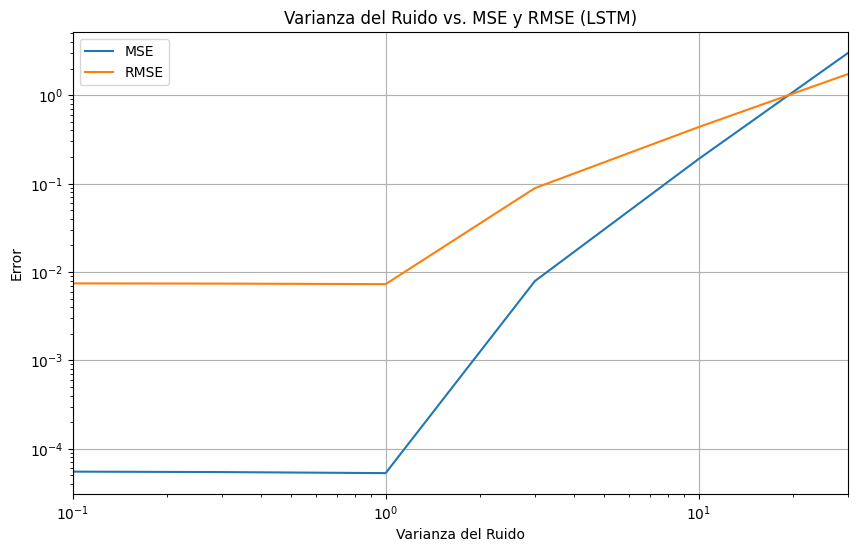

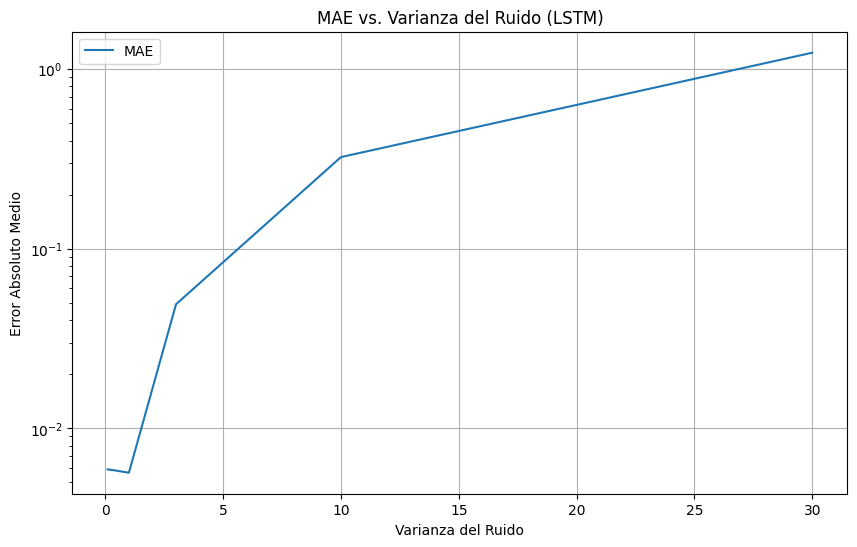

In [ ]:
# prompt: # prompt: para esta red neuronal LSTM, adapta la celda de codigo que hice para calcular y graficar todos los errores para las otras dos redes neuronales

# Predicciones para cada matriz con ruido diferente
Y_pred1_lstm = model.predict(np.reshape(matriz_X1, (matriz_X1.shape[0], 1, matriz_X1.shape[1])))
Y_pred2_lstm = model.predict(np.reshape(matriz_X2, (matriz_X2.shape[0], 1, matriz_X2.shape[1])))
Y_pred3_lstm = model.predict(np.reshape(matriz_X3, (matriz_X3.shape[0], 1, matriz_X3.shape[1])))
Y_pred4_lstm = model.predict(np.reshape(matriz_X4, (matriz_X4.shape[0], 1, matriz_X4.shape[1])))
Y_pred5_lstm = model.predict(np.reshape(matriz_X5, (matriz_X5.shape[0], 1, matriz_X5.shape[1])))
Y_pred6_lstm = model.predict(np.reshape(matriz_X6, (matriz_X6.shape[0], 1, matriz_X6.shape[1])))

# Calcular MSE, MAE, RMSE para cada conjunto de predicciones
mse1_lstm = mean_squared_error(matriz_PSD1, Y_pred1_lstm)
mse2_lstm = mean_squared_error(matriz_PSD2, Y_pred2_lstm)
mse3_lstm = mean_squared_error(matriz_PSD3, Y_pred3_lstm)
mse4_lstm = mean_squared_error(matriz_PSD4, Y_pred4_lstm)
mse5_lstm = mean_squared_error(matriz_PSD5, Y_pred5_lstm)
mse6_lstm = mean_squared_error(matriz_PSD6, Y_pred6_lstm)
mae1_lstm = mean_absolute_error(matriz_PSD1, Y_pred1_lstm)
rmse1_lstm = np.sqrt(mse1_lstm)
mae2_lstm = mean_absolute_error(matriz_PSD2, Y_pred2_lstm)
rmse2_lstm = np.sqrt(mse2_lstm)
mae3_lstm = mean_absolute_error(matriz_PSD3, Y_pred3_lstm)
rmse3_lstm = np.sqrt(mse3_lstm)
mae4_lstm = mean_absolute_error(matriz_PSD4, Y_pred4_lstm)
rmse4_lstm = np.sqrt(mse4_lstm)
mae5_lstm = mean_absolute_error(matriz_PSD5, Y_pred5_lstm)
rmse5_lstm = np.sqrt(mse5_lstm)
mae6_lstm = mean_absolute_error(matriz_PSD6, Y_pred6_lstm)
rmse6_lstm = np.sqrt(mse6_lstm)

# Crear un DataFrame de Pandas para las métricas L2
df_l2_lstm = pd.DataFrame({
    'Varianza del Ruido': [0.1, 0.3, 1, 3, 10, 30],
    'MSE': [mse1_lstm, mse2_lstm, mse3_lstm, mse4_lstm, mse5_lstm, mse6_lstm],
    'RMSE': [rmse1_lstm, rmse2_lstm, rmse3_lstm, rmse4_lstm, rmse5_lstm, rmse6_lstm]
})

# Crear un DataFrame de Pandas para las métricas L1
df_l1_lstm = pd.DataFrame({
    'Varianza del Ruido': [0.1, 0.3, 1, 3, 10, 30],
    'MAE': [mae1_lstm, mae2_lstm, mae3_lstm, mae4_lstm, mae5_lstm, mae6_lstm]
})

# Imprimir las tablas
print("Tabla de Métricas L2 (LSTM):")
print(df_l2_lstm)
print("\nTabla de Métricas L1 (LSTM):")
print(df_l1_lstm)

# Gráfica de MSE y RMSE
plt.figure(figsize=(10, 6))
plt.loglog(df_l2_lstm['Varianza del Ruido'], df_l2_lstm['MSE'], label='MSE')
plt.loglog(df_l2_lstm['Varianza del Ruido'], df_l2_lstm['RMSE'], label='RMSE')
plt.ylabel('Error')
plt.xlabel('Varianza del Ruido')
plt.title('Varianza del Ruido vs. MSE y RMSE (LSTM)')
plt.xlim(min(df_l2_lstm['Varianza del Ruido']), max(df_l2_lstm['Varianza del Ruido']))
plt.legend()
plt.grid(True)
plt.show()

# Gráfica de MAE
plt.figure(figsize=(10, 6))
plt.semilogy(df_l1_lstm['Varianza del Ruido'], df_l1_lstm['MAE'], label='MAE')
plt.xlabel('Varianza del Ruido')
plt.ylabel('Error Absoluto Medio')
plt.title('MAE vs. Varianza del Ruido (LSTM)')
plt.legend()
plt.grid(True)
plt.show()


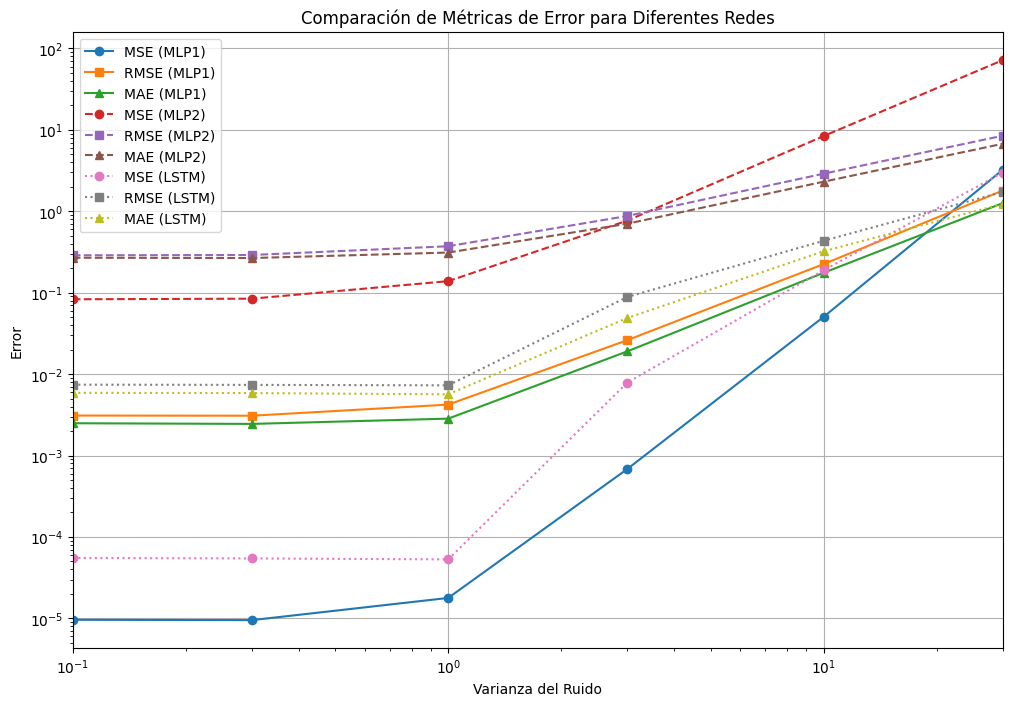

In [ ]:
# prompt: pon el mse, rmse y mae calculado para cada red en una sola grafica

# Gráfica de MSE, RMSE y MAE para todas las redes
plt.figure(figsize=(12, 8))

# MLP primera estrategia
plt.loglog(df_l2['Varianza del Ruido'], df_l2['MSE'], label='MSE (MLP1)', marker='o', linestyle='-')
plt.loglog(df_l2['Varianza del Ruido'], df_l2['RMSE'], label='RMSE (MLP1)', marker='s', linestyle='-')
plt.semilogy(df_l1['Varianza del Ruido'], df_l1['MAE'], label='MAE (MLP1)', marker='^', linestyle='-')

# MLP segundo método
plt.loglog(df_l2_new['Varianza del Ruido'], df_l2_new['MSE'], label='MSE (MLP2)', marker='o', linestyle='--')
plt.loglog(df_l2_new['Varianza del Ruido'], df_l2_new['RMSE'], label='RMSE (MLP2)', marker='s', linestyle='--')
plt.semilogy(df_l1_new['Varianza del Ruido'], df_l1_new['MAE'], label='MAE (MLP2)', marker='^', linestyle='--')

# LSTM
plt.loglog(df_l2_lstm['Varianza del Ruido'], df_l2_lstm['MSE'], label='MSE (LSTM)', marker='o', linestyle=':')
plt.loglog(df_l2_lstm['Varianza del Ruido'], df_l2_lstm['RMSE'], label='RMSE (LSTM)', marker='s', linestyle=':')
plt.semilogy(df_l1_lstm['Varianza del Ruido'], df_l1_lstm['MAE'], label='MAE (LSTM)', marker='^', linestyle=':')

plt.ylabel('Error')
plt.xlabel('Varianza del Ruido')
plt.title('Comparación de Métricas de Error para Diferentes Redes')
plt.xlim(min(df_l2['Varianza del Ruido']), max(df_l2['Varianza del Ruido']))
plt.legend()
plt.grid(True)
plt.show()
